<a href="https://colab.research.google.com/github/enxo7899/INM702-Mathematics-and-Programming-for-AI/blob/main/code_230054615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook guides you through the process of implementing a multi-layer neural network for classification using the MNIST dataset. We'll start by setting up our environment and loading the dataset, and then move on to implementing various components of the neural network in Numpy.

# Task A: Implement Sigmoid and ReLU Layers


Sigmoid Output: [0.01798621 0.11920292 0.5        0.73105858 0.88079708]
Sigmoid Gradient: [0.01766271 0.10499359 0.25       0.19661193 0.10499359]
ReLU Output: [0 0 0 1 2]
ReLU Gradient: [0 0 0 1 1]


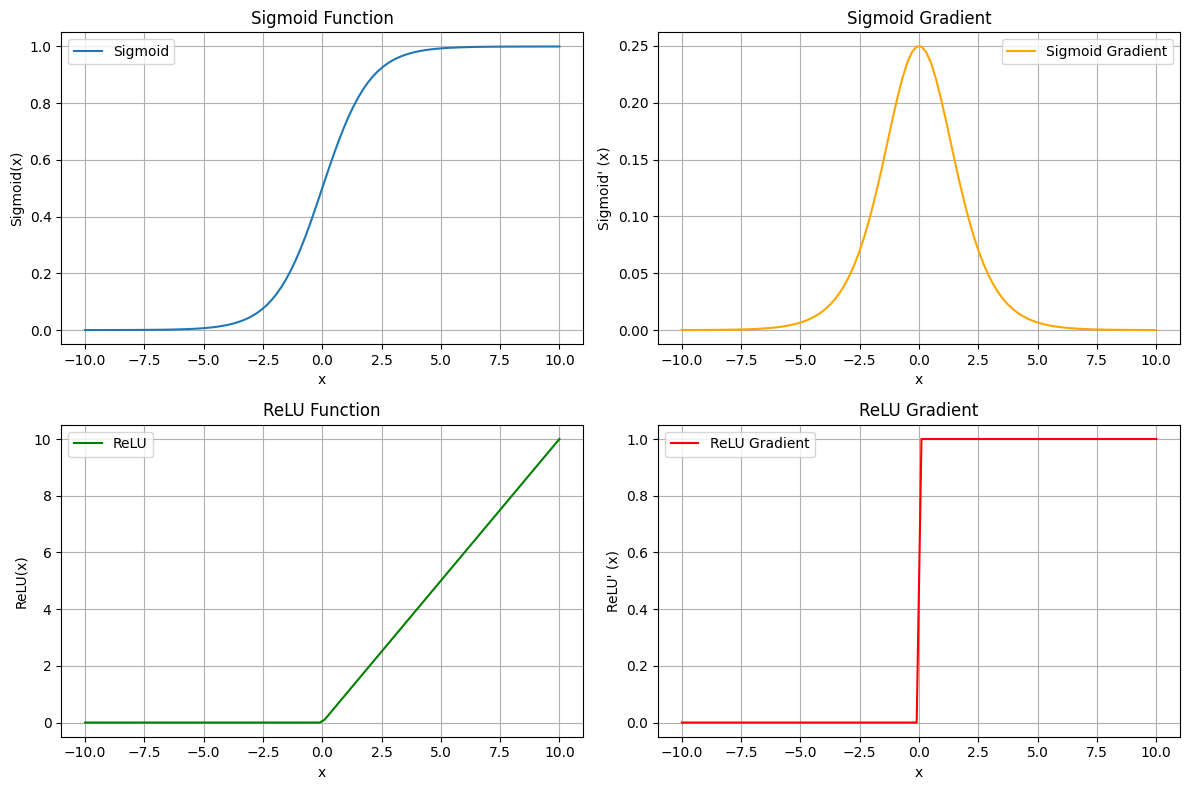

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """
    Computes the sigmoid activation function.
    Sigmoid(x) = 1 / (1 + exp(-x))
    It maps the input 'x' to a value between 0 and 1, which is useful for binary classification.

    Parameters:
    x (numpy array): Input data

    Returns:
    numpy array: Output of sigmoid function
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_backward(x):
    """
    Computes the backward pass (gradient) of the sigmoid function.
    The gradient of Sigmoid(x) is Sigmoid(x) * (1 - Sigmoid(x)).
    Used in backpropagation to compute gradients.

    Parameters:
    x (numpy array): Input data

    Returns:
    numpy array: Gradient of sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    """
    Computes the ReLU (Rectified Linear Unit) activation function.
    ReLU(x) = max(0, x)
    Keeps positive values as is, and maps negative values to 0.
    Used to introduce non-linearity in the network.

    Parameters:
    x (numpy array): Input data

    Returns:
    numpy array: Output of ReLU function
    """
    return np.maximum(0, x)

def relu_backward(x):
    """
    Computes the backward pass (gradient) of the ReLU function.
    The gradient of ReLU(x) is 1 for x > 0, and 0 otherwise.
    Used in backpropagation to compute gradients.

    Parameters:
    x (numpy array): Input data

    Returns:
    numpy array: Gradient of ReLU function
    """
    return np.where(x > 0, 1, 0)

# Test the functions with a sample input
x = np.array([-4, -2, 0, 1, 2])

sigmoid_output = sigmoid(x)
sigmoid_backward_output = sigmoid_backward(x)
relu_output = relu(x)
relu_backward_output = relu_backward(x)

# Display the outputs and gradients
print("Sigmoid Output:", sigmoid_output)
print("Sigmoid Gradient:", sigmoid_backward_output)
print("ReLU Output:", relu_output)
print("ReLU Gradient:", relu_backward_output)

# Generating a range of values for plotting
x_graph = np.linspace(-10, 10, 100)

# Compute the outputs and gradients for the graph range
sigmoid_graph = sigmoid(x_graph)
sigmoid_backward_graph = sigmoid_backward(x_graph)
relu_graph = relu(x_graph)
relu_backward_graph = relu_backward(x_graph)

# Plotting - Creating a figure with four subplots
plt.figure(figsize=(12, 8))

# Plotting Sigmoid Function
plt.subplot(2, 2, 1)
plt.plot(x_graph, sigmoid_graph, label="Sigmoid")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.legend()

# Plotting Sigmoid Gradient (Backward)
plt.subplot(2, 2, 2)
plt.plot(x_graph, sigmoid_backward_graph, label="Sigmoid Gradient", color="orange")
plt.title("Sigmoid Gradient")
plt.xlabel("x")
plt.ylabel("Sigmoid' (x)")
plt.grid(True)
plt.legend()

# Plotting ReLU Function
plt.subplot(2, 2, 3)
plt.plot(x_graph, relu_graph, label="ReLU", color="green")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()

# Plotting ReLU Gradient (Backward)
plt.subplot(2, 2, 4)
plt.plot(x_graph, relu_backward_graph, label="ReLU Gradient", color="red")
plt.title("ReLU Gradient")
plt.xlabel("x")
plt.ylabel("ReLU' (x)")
plt.grid(True)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Task B: Implement Softmax Layer



Softmax Output: [[0.00626879 0.01704033 0.04632042 0.93037047]
 [0.41362198 0.02059303 0.15216302 0.41362198]]
Softmax Derivative: [[ 0.00622949 -0.00010682 -0.00029037 -0.00583229]
 [-0.00010682  0.01674996 -0.00078932 -0.01585382]
 [-0.00029037 -0.00078932  0.04417484 -0.04309515]
 [-0.00583229 -0.01585382 -0.04309515  0.06478126]]


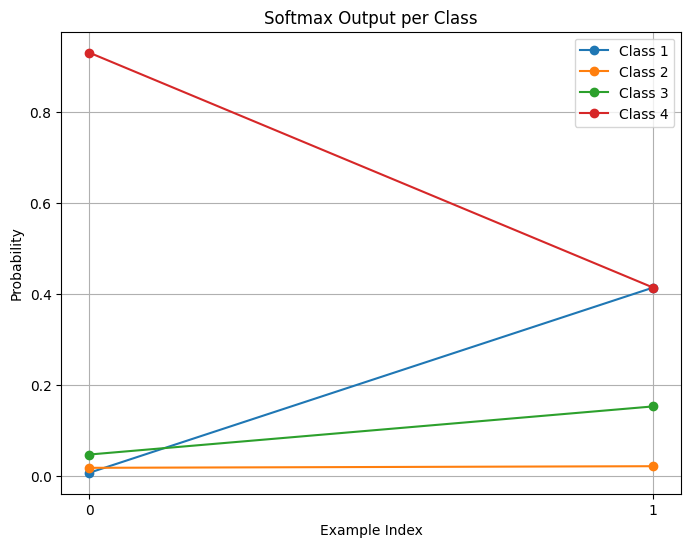

In [ ]:
def softmax(x):
    """
    Computes the softmax function for each row of the input x.

    The function computes the exponentials of each element and normalizes them
    by the sum of exponentials. To improve numerical stability, the maximum value
    in x is subtracted from each element before exponentiation.

    Parameters:
    x (numpy array): Input data (typically logits)

    Returns:
    numpy array: Output of softmax function
    """
    # Shift the input values to avoid overflow in exp
    x_shifted = x - np.max(x, axis=-1, keepdims=True)
    exps = np.exp(x_shifted)
    softmax_outputs = exps / np.sum(exps, axis=-1, keepdims=True)
    return softmax_outputs

def softmax_backward(softmax_output):
    """
    Computes the backward pass (gradient) of the softmax function.
    Given the output of the softmax function, this function computes the derivative
    (Jacobian matrix) for backpropagation.

    Parameters:
    softmax_output (numpy array): Output of softmax function

    Returns:
    numpy array: Gradient of softmax function
    """
    # Initialize an array for the Jacobian matrix
    jacobian_m = np.zeros((softmax_output.shape[0], softmax_output.shape[0]))

    # Compute the derivative
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = softmax_output[i] * (1 - softmax_output[i])
            else:
                jacobian_m[i][j] = -softmax_output[i] * softmax_output[j]
    return jacobian_m

# Example usage with a sample input
logits = np.array([[1.0, 2.0, 3.0, 6.0], [1.0, -2.0, 0.0, 1.0]])
softmax_output = softmax(logits)
print("Softmax Output:", softmax_output)

# Computing derivative for the first row of softmax output as an example
softmax_backward_output = softmax_backward(softmax_output[0])
print("Softmax Derivative:", softmax_backward_output)

# Plotting the softmax function
plt.figure(figsize=(8, 6))

# Assuming logits is a 2D array where each row is a set of logits for an example,
# and each column corresponds to a class.
num_examples = logits.shape[0]
example_indices = np.arange(num_examples)

# Plot for each class
for i in range(softmax_output.shape[1]):
    plt.plot(example_indices, softmax_output[:, i], label=f"Class {i+1}", marker='o')

plt.title("Softmax Output per Class")
plt.xlabel("Example Index")
plt.xticks(ticks=example_indices)  # Set x-ticks to be the example indices
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

# Task C: Implement Dropout



Forward Pass Output: [2. 4. 6. 8.]
Backward Pass Gradient: [0.2 0.4 0.6 0.8]


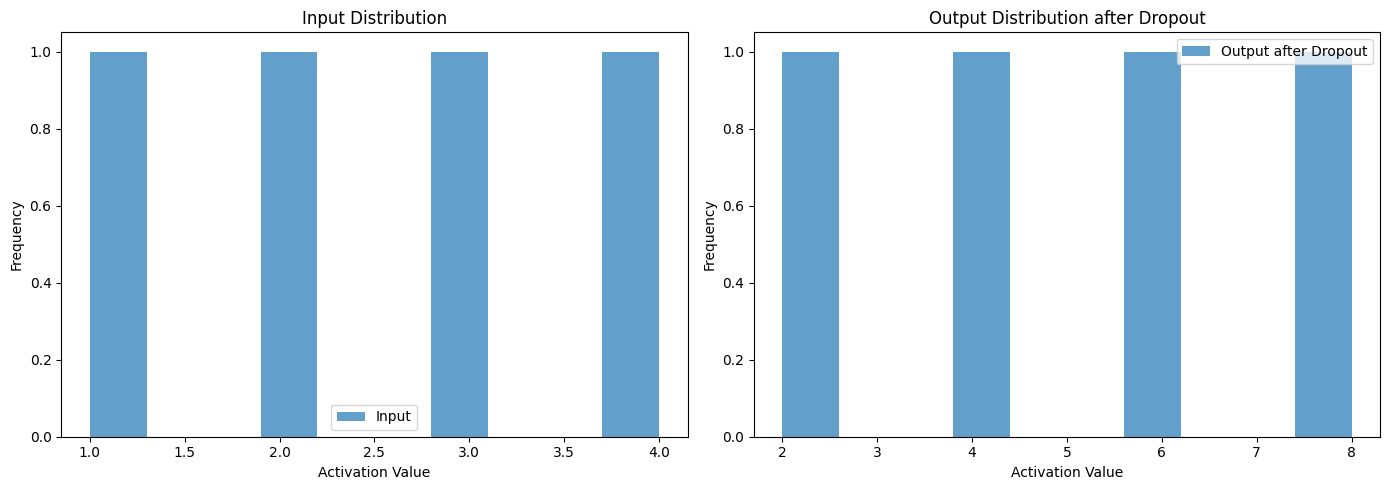

In [ ]:
def dropout_forward(x, dropout_rate):
    """
    Applies dropout to the input.

    Parameters:
    x (numpy array): Input data (activations from a previous layer)
    dropout_rate (float): Probability of dropping out a neuron (between 0 and 1)

    Returns:
    numpy array: Output after applying dropout
    numpy array: Dropout mask used to zero out neurons
    """
    # Create a dropout mask using the dropout rate
    dropout_mask = np.random.rand(*x.shape) > dropout_rate

    # Scale the activations to maintain the expected value
    scale_factor = 1 / (1 - dropout_rate)
    x_dropout = x * dropout_mask * scale_factor

    return x_dropout, dropout_mask

def dropout_backward(grad_output, dropout_mask, dropout_rate):
    """
    Backward pass for the dropout layer.

    Parameters:
    grad_output (numpy array): Gradient of the loss with respect to the output of the dropout layer
    dropout_mask (numpy array):a Dropout mask used in the forward pass
    scale_factor (float): Scaling factor used in the forward pass

    Returns:
    numpy array: Gradient of the loss with respect to the input of the dropout layer
    """
    scale_factor = 1 / (1 - dropout_rate)
    return grad_output * dropout_mask * scale_factor

# Example usage
x = np.array([1.0, 2.0, 3.0, 4.0])  # Example input
dropout_rate = 0.5  # Example dropout rate

# Forward pass
x_dropout, dropout_mask = dropout_forward(x, dropout_rate)

# Assuming some gradient output from the next layer in backpropagation
grad_output = np.array([0.1, 0.2, 0.3, 0.4])

# Backward pass
grad_input = dropout_backward(grad_output, dropout_mask, dropout_rate)

print("Forward Pass Output:", x_dropout)
print("Backward Pass Gradient:", grad_input)

# Visualize the input and output distributions of the dropout layer
plt.figure(figsize=(14, 5))

# Histogram of the input
plt.subplot(1, 2, 1)
plt.hist(x, bins=10, alpha=0.7, label='Input')
plt.title('Input Distribution')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.legend()

# Histogram of the output after dropout
plt.subplot(1, 2, 2)
plt.hist(x_dropout, bins=10, alpha=0.7, label='Output after Dropout')
plt.title('Output Distribution after Dropout')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# Task D: Implement a Fully Parametrizable Neural Network Class



11490434/11490434 [==============================] - 0s 0us/step
Epoch 0, Loss: 2.3026418493003042, Test Accuracy: 10.95%
Epoch 100, Loss: 2.3008448024086885, Test Accuracy: 11.35%
Epoch 200, Loss: 2.2987206748781444, Test Accuracy: 11.35%
Epoch 300, Loss: 2.2666824733123914, Test Accuracy: 23.15%
Epoch 400, Loss: 1.4612050579507323, Test Accuracy: 50.62%
Epoch 500, Loss: 0.7939848531330733, Test Accuracy: 75.67%
Epoch 600, Loss: 0.6152988145714735, Test Accuracy: 82.53%
Epoch 700, Loss: 0.5185864266429747, Test Accuracy: 85.63%
Epoch 800, Loss: 0.45640230352825983, Test Accuracy: 87.31%
Epoch 900, Loss: 0.41737272676620585, Test Accuracy: 88.44%
Test accuracy: 89.08%


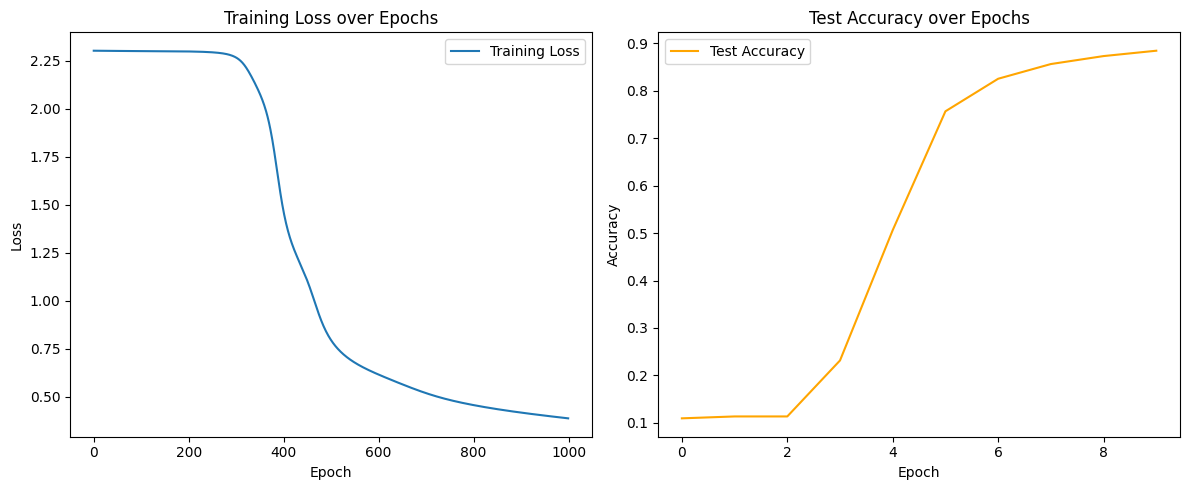

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset (handwritten digits)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Flatten the images to 1D arrays (28x28 pixels to 784)
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# Normalize image data from [0, 255] to [0, 1] (for better training performance)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded format (10 classes for digits 0-9)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function for backpropagation
def sigmoid_backward(z):
    return z * (1 - z)

# ReLU activation function
def relu(z):
    return np.maximum(0, z)

# Derivative of ReLU function for backpropagation
def relu_backward(z):
    return np.where(z > 0, 1, 0)

# Softmax activation function for the output layer
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Neural Network class
class Neural_Network:
    def __init__(self, layer_sizes, layer_activations):
        self.layers = len(layer_sizes) - 1  # Number of layers (excluding input layer)
        self.layer_activations = layer_activations  # Activation functions for each layer
        self.weights = []  # Weights for each layer
        self.biases = []  # Biases for each layer

        # Initialize weights and biases
        for i in range(self.layers):
            weight = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01
            bias = np.zeros((1, layer_sizes[i + 1]))
            self.weights.append(weight)
            self.biases.append(bias)

    # Forward propagation through the network
    def forward(self, input_data):
        self.layer_outputs = {'Layer_0': input_data}
        output = input_data

        # Compute the output for each layer
        for i in range(self.layers):
            incoming = np.dot(output, self.weights[i]) + self.biases[i]

            # Apply the appropriate activation function
            if self.layer_activations[i] == 'relu':
                output = relu(incoming)
            elif self.layer_activations[i] == 'sigmoid':
                output = sigmoid(incoming)
            elif i == self.layers - 1:  # Use softmax for the last layer
                output = softmax(incoming)

            # Store the output for backpropagation
            self.layer_outputs['Layer_' + str(i+1)] = output

        return output

    # Compute the cross-entropy loss
    def loss(self, predicted, actual):
        sample_count = actual.shape[0]
        return -np.sum(actual * np.log(predicted + 1e-8)) / sample_count

    # Backward propagation to compute gradients
    def backward(self, input_data, actual_labels):
        gradients = []  # Gradients for each layer
        sample_count = actual_labels.shape[0]
        error_signal = None

        # Iterate over layers in reverse order to propagate the error
        for i in reversed(range(self.layers)):
            layer_output = self.layer_outputs['Layer_' + str(i+1)]
            layer_input = self.layer_outputs['Layer_' + str(i)]

            # Compute the error signal
            if i == self.layers - 1:
                error_signal = layer_output - actual_labels
            else:
                error_signal = error_signal.dot(self.weights[i+1].T) * relu_backward(layer_output)

            # Compute gradients for weights and biases
            weight_gradient = layer_input.T.dot(error_signal) / sample_count
            bias_gradient = np.sum(error_signal, axis=0, keepdims=True) / sample_count

            # Store the gradients
            gradients.insert(0, (weight_gradient, bias_gradient))

        return gradients

    # Update weights and biases based on computed gradients
    def update(self, gradients, learning_rate):
        for i in range(self.layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]

    # Train the neural network
    def train(self, train_data, train_labels, learning_rate, epochs):
        training_losses = []
        test_accuracies = []

        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward(train_data)

            # Compute loss
            current_loss = self.loss(predictions, train_labels)
            training_losses.append(current_loss)

            # Backward pass
            gradients = self.backward(train_data, train_labels)

            # Update weights and biases
            self.update(gradients, learning_rate)

            # Evaluate the model on test data
            if epoch % 100 == 0:
                test_predictions = self.forward(X_test)
                test_accuracy = np.mean(np.argmax(test_predictions, axis=1) == np.argmax(Y_test, axis=1))
                test_accuracies.append(test_accuracy)
                print(f"Epoch {epoch}, Loss: {current_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

        return training_losses, test_accuracies

# Example usage
layer_sizes = [784, 128, 64, 10]  # Layer sizes (input, hidden layers, output)
layer_activations = ['relu', 'relu', 'softmax']  # Activation functions
nn = Neural_Network(layer_sizes, layer_activations)
training_losses, test_accuracies = nn.train(X_train, Y_train, learning_rate=0.1, epochs=1000)

# Evaluate the model
predicted_test = nn.forward(X_test)
test_accuracy = np.mean(np.argmax(predicted_test, axis=1) == np.argmax(Y_test, axis=1))
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plotting
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Task E: Implement Optimizer

Optimizers are crucial in training neural networks. We'll implement two types of gradient descent optimizers and discuss their differences and use-cases.

Epoch 0, Train Loss: 2.302606307087364, Validation Loss: 2.30257634595414
Epoch 100, Train Loss: 0.6382579368403499, Validation Loss: 0.6239440774622905
Epoch 200, Train Loss: 0.2737326575127087, Validation Loss: 0.2686805147435467
Epoch 300, Train Loss: 0.16368703458305306, Validation Loss: 0.17222205947581593
Epoch 400, Train Loss: 0.1087796690541752, Validation Loss: 0.13057230602666803
Epoch 500, Train Loss: 0.07686138147930445, Validation Loss: 0.10907481239285728
Epoch 600, Train Loss: 0.056548305845398356, Validation Loss: 0.09795223614329612
Epoch 700, Train Loss: 0.04258990556587707, Validation Loss: 0.09240630772122242
Epoch 800, Train Loss: 0.032323231197484, Validation Loss: 0.08972888860886881
Epoch 900, Train Loss: 0.024671485889741707, Validation Loss: 0.08879802448405193


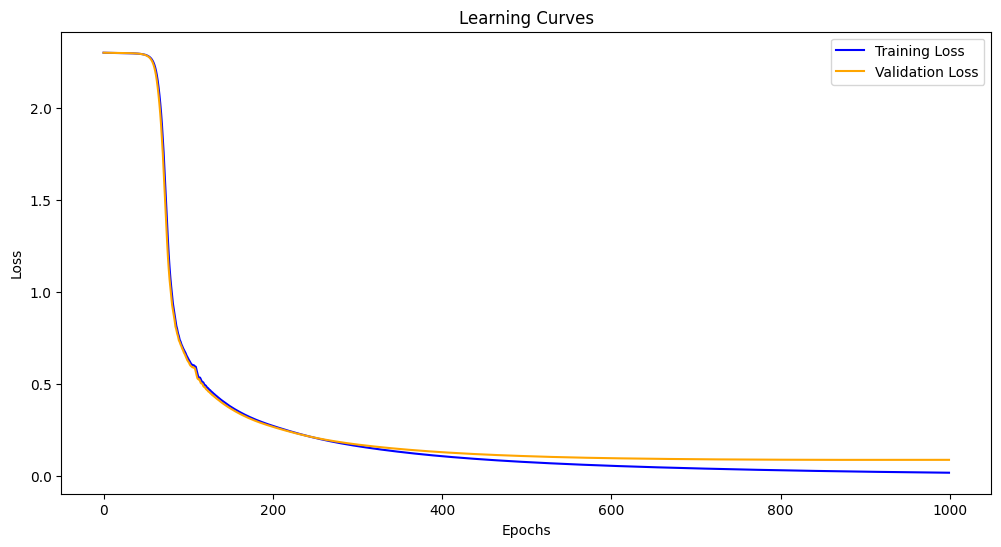

Test accuracy: 97.30%


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load the MNIST dataset (handwritten digits)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Flatten the images to 1D arrays (28x28 pixels to 784)
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# Normalize image data from [0, 255] to [0, 1] for better training performance
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded format (10 classes for digits 0-9)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function for backpropagation
def sigmoid_backward(z):
    return z * (1 - z)

# ReLU activation function
def relu(z):
    return np.maximum(0, z)

# Derivative of ReLU function for backpropagation
def relu_backward(z):
    return np.where(z > 0, 1, 0)

# Softmax activation function for the output layer
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Neural Network class
class Neural_Network:
    def __init__(self, layer_sizes, layer_activations):
        self.layers = len(layer_sizes) - 1  # Number of layers (excluding input layer)
        self.layer_activations = layer_activations  # Activation functions for each layer
        self.weights = []  # Weights for each layer
        self.biases = []  # Biases for each layer
        self.velocity_weights = []  # Velocity for weights (for momentum optimizer)
        self.velocity_biases = []  # Velocity for biases (for momentum optimizer)

        # Initialize weights, biases, and their velocities
        for i in range(self.layers):
            weight = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01
            bias = np.zeros((1, layer_sizes[i + 1]))
            self.weights.append(weight)
            self.biases.append(bias)
            self.velocity_weights.append(np.zeros_like(weight))  # Initialize velocity for weights
            self.velocity_biases.append(np.zeros_like(bias))  # Initialize velocity for biases


    # Forward propagation through the network
    def forward(self, input_data):
        self.layer_outputs = {'Layer_0': input_data}
        output = input_data

        # Compute the output for each layer
        for i in range(self.layers):
            incoming = np.dot(output, self.weights[i]) + self.biases[i]

            # Apply the appropriate activation function
            if self.layer_activations[i] == 'relu':
                output = relu(incoming)
            elif self.layer_activations[i] == 'sigmoid':
                output = sigmoid(incoming)
            elif i == self.layers - 1:  # Use softmax for the last layer
                output = softmax(incoming)

            # Store the output for backpropagation
            self.layer_outputs['Layer_' + str(i+1)] = output

        return output

    # Compute the cross-entropy loss
    def loss(self, predicted, actual):
        sample_count = actual.shape[0]
        return -np.sum(actual * np.log(predicted + 1e-8)) / sample_count

    # Backward propagation to compute gradients
    def backward(self, input_data, actual_labels):
        gradients = []  # Gradients for each layer
        sample_count = actual_labels.shape[0]
        error_signal = None

        # Iterate over layers in reverse order to propagate the error
        for i in reversed(range(self.layers)):
            layer_output = self.layer_outputs['Layer_' + str(i+1)]
            layer_input = self.layer_outputs['Layer_' + str(i)]

            # Compute the error signal
            if i == self.layers - 1:
                error_signal = layer_output - actual_labels
            else:
                error_signal = error_signal.dot(self.weights[i+1].T) * relu_backward(layer_output)

            # Compute gradients for weights and biases
            weight_gradient = layer_input.T.dot(error_signal) / sample_count
            bias_gradient = np.sum(error_signal, axis=0, keepdims=True) / sample_count

            # Store the gradients
            gradients.insert(0, (weight_gradient, bias_gradient))

        return gradients

    # Update weights and biases based on computed gradients
    # Select between standard SGD and SGD with Momentum
    def optimize(self, gradients, learning_rate, optimizer_type='sgd', momentum=0.9):
        if optimizer_type == 'sgd':
            for i in range(self.layers):
                self.weights[i] -= learning_rate * gradients[i][0]
                self.biases[i] -= learning_rate * gradients[i][1]
        elif optimizer_type == 'momentum':
            for i in range(self.layers):
                self.velocity_weights[i] = momentum * self.velocity_weights[i] + gradients[i][0]
                self.velocity_biases[i] = momentum * self.velocity_biases[i] + gradients[i][1]
                self.weights[i] -= learning_rate * self.velocity_weights[i]
                self.biases[i] -= learning_rate * self.velocity_biases[i]

    # Train the neural network
    def train(self, train_data, train_labels, val_data, val_labels, learning_rate, epochs, optimizer_type='sgd', momentum=0.9):
        # Lists to keep track of loss values at each epoch for plotting
        train_losses = []
        val_losses = []

        # Iterate over the number of epochs to train the network
        for epoch in range(epochs):
            # Perform a forward pass through the network with the training data
            predictions = self.forward(train_data)
            # Calculate the loss between the network's predictions and the true training labels
            train_loss = self.loss(predictions, train_labels)
            # Append the current training loss to the train_losses list for later visualization
            train_losses.append(train_loss)

            # Compute the gradients for each layer by performing a backward pass
            gradients = self.backward(train_data, train_labels)
            # Use the specified optimization method (SGD or SGD with momentum) to update the weights and biases
            self.optimize(gradients, learning_rate, optimizer_type, momentum)

            # Perform a forward pass through the network with the validation data
            val_predictions = self.forward(val_data)
            # Calculate the loss between the network's predictions and the true validation labels
            val_loss = self.loss(val_predictions, val_labels)
            # Append the current validation loss to the val_losses list for later visualization
            val_losses.append(val_loss)

            # Every 100 epochs, print the epoch number and the current training and validation loss
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss}, Validation Loss: {val_loss}")

        # After training, use matplotlib to plot the training and validation loss over all epochs
        plt.figure(figsize=(12, 6))
        # Plot the training loss as a blue line
        plt.plot(train_losses, label='Training Loss', color='blue')
        # Plot the validation loss as an orange line
        plt.plot(val_losses, label='Validation Loss', color='orange')
        # Title of the plot
        plt.title('Learning Curves')
        # Label for the x-axis
        plt.xlabel('Epochs')
        # Label for the y-axis
        plt.ylabel('Loss')
        # Show a legend to label the blue and orange lines
        plt.legend()
        # Display the plot
        plt.show()


from sklearn.model_selection import train_test_split
X_train_val, X_val, Y_train_val, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

# Layer sizes and activations
layer_sizes = [784, 128, 64, 10]  # Layer sizes (input, hidden layers, output)
layer_activations = ['relu', 'relu', 'softmax']  # Activation functions

# Initialize and train the neural network
nn = Neural_Network(layer_sizes, layer_activations)
nn.train(X_train_val, Y_train_val, X_val, Y_val, learning_rate=0.1, epochs=1000, optimizer_type='momentum')

# Evaluate the model
predicted_test = nn.forward(X_test)
test_accuracy = np.mean(np.argmax(predicted_test, axis=1) == np.argmax(Y_test, axis=1))
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


#Task 2a)

The dataset we chose was Daily Climate time series data that we got in Keggle.com. The link to the dataset is: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data. The main reason we used this time-series dataset is to do an analysis of weather patterns by focusing in prediction of average daily temperature, which is shown under the column ‘meantemp’ in the dataset. We did the analysis by using other variables which are available on this dataset. The main objective was to develop a predictive model, using LSTM networks, which are commonly used in Time Series Datasets.

#Describe and implement a base model.

Epoch 1/10 - Loss: 0.2030, MAE: 0.2115
Epoch 2/10 - Loss: 0.0449, MAE: 0.1495
Epoch 3/10 - Loss: 0.0288, MAE: 0.1238
Epoch 4/10 - Loss: 0.0164, MAE: 0.0801
Epoch 5/10 - Loss: 0.0080, MAE: 0.0663
Epoch 6/10 - Loss: 0.0066, MAE: 0.0603
Epoch 7/10 - Loss: 0.0056, MAE: 0.0564
Epoch 8/10 - Loss: 0.0051, MAE: 0.0557
Epoch 9/10 - Loss: 0.0045, MAE: 0.0511
Epoch 10/10 - Loss: 0.0043, MAE: 0.0512
Mean Squared Error: 0.005016119862359894


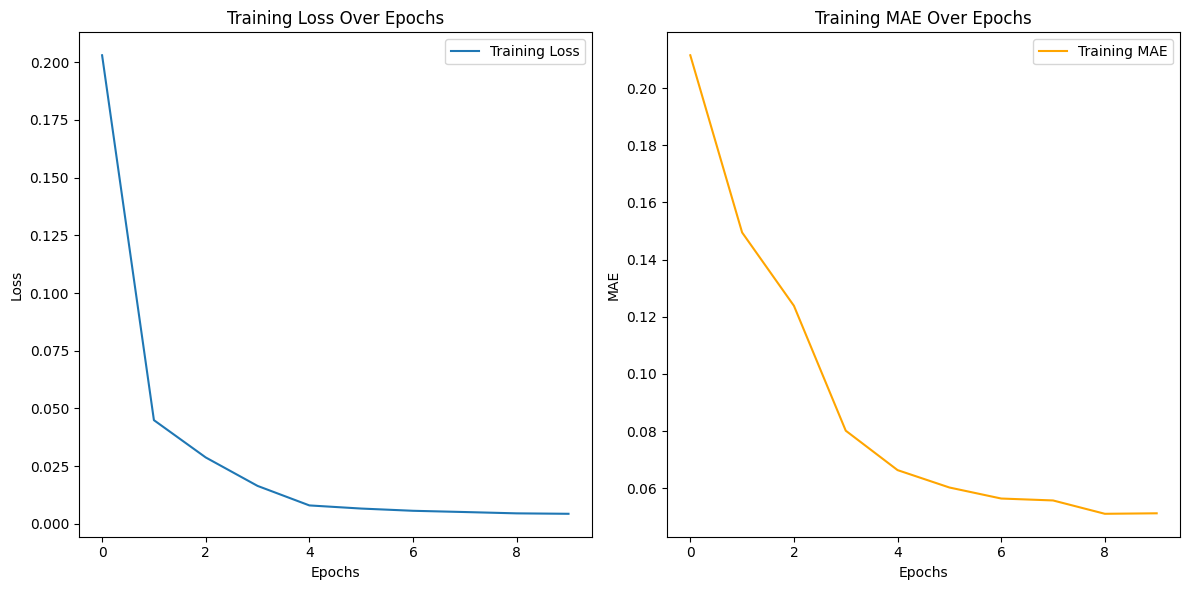

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

# Loaded the data, training and testing data from CSV files.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data Preprocessing
# We converted the 'date' column to a datetime object for easy manipulation.
# Extracted year, month, and day as separate features which might provide valuable signals for our model.
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

#We used MinMaxScaler for scaling all features to a range between 0 and 1. which is important to ensure that all features contribute equally to the result and improves training stability.
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

# Since LSTM models requre data in a sequence format we need a function to create the sequences
def create_sequences(data, target_column, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length][target_column]
        sequences.append((sequence, label))
    return sequences
sequence_length = 5
train_sequences = create_sequences(train_scaled, 0, sequence_length)
test_sequences = create_sequences(test_scaled, 0, sequence_length)

# We converted sequences into tensors as PyTorch models require data in the form of tensors
def create_tensors(sequences):
    X, y = [], []
    for sequence, label in sequences:
        X.append(sequence)
        y.append(label)
    return torch.Tensor(X), torch.Tensor(y)
X_train, y_train = create_tensors(train_sequences)
X_test, y_test = create_tensors(test_sequences)

# DataLoaderimplementeation.
batch_size = 64
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size)


#Defining our base model which is LSTM model for time-series froecasting
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        # Initialized hidden state and cell state to zeros
        self.hidden_cell = (torch.zeros(1, input_seq.size(0), self.hidden_layer_size).to(input_seq.device),
                            torch.zeros(1, input_seq.size(0), self.hidden_layer_size).to(input_seq.device))
        # Passed input through LSTM layer
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        # Generated predictions through the linear layer
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

# Mean Absolute Error Calculation
def mean_absolute_error(predictions, actuals):
    return np.mean(np.abs(np.array(actuals) - np.array(predictions)))

# This function evaluates the model on a given dataset.
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    predictions, actuals = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            y_pred = model(inputs)
            predictions.extend(y_pred.view(-1).tolist())
            actuals.extend(labels.tolist())
    return predictions, actuals

# Model Initialization,specifying the input size, hidden layer size, and output size, and initialize the LSTM model.
input_size = train_scaled.shape[1]
hidden_layer_size = 100
output_size = 1
model = LSTMModel(input_size, hidden_layer_size, output_size)
loss_function = nn.MSELoss()  # Using Mean Squared Error loss function for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer that implements the Adam algorithm

# Training Loop:
epochs = 10
train_losses = []
train_mae = []
for epoch in range(epochs):
    epoch_losses = []
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = loss_function(y_pred.view(-1), labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    train_loss = np.mean(epoch_losses)
    train_losses.append(train_loss)

    #Mean Absolute Erro calculation for training data
    train_predictions, train_actuals = evaluate_model(model, train_loader)
    epoch_mae = mean_absolute_error(train_predictions, train_actuals)
    train_mae.append(epoch_mae)
    print(f'Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f}, MAE: {epoch_mae:.4f}')

# Model Evaluation on Test Set
predictions, actuals = evaluate_model(model, test_loader)
mse = np.mean((np.array(actuals) - np.array(predictions))**2)
print(f'Mean Squared Error: {mse}')

# Plotting Training Loss and MAE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Training MAE', color='orange')
plt.title('Training MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


#Task 2C

in order to improve we made some changes on teh LSTM architechture.

Epoch 1/20 - Loss: 0.5370, MAE: 0.2920
Epoch 2/20 - Loss: 0.0983, MAE: 0.2301
Epoch 3/20 - Loss: 0.0815, MAE: 0.2124
Epoch 4/20 - Loss: 0.0762, MAE: 0.2084
Epoch 5/20 - Loss: 0.0719, MAE: 0.2033
Epoch 6/20 - Loss: 0.0716, MAE: 0.1975
Epoch 7/20 - Loss: 0.0677, MAE: 0.1954
Epoch 8/20 - Loss: 0.0658, MAE: 0.1926
Epoch 9/20 - Loss: 0.0645, MAE: 0.1933
Epoch 10/20 - Loss: 0.0653, MAE: 0.1875
Epoch 11/20 - Loss: 0.0608, MAE: 0.1883
Epoch 12/20 - Loss: 0.0611, MAE: 0.1859
Epoch 13/20 - Loss: 0.0603, MAE: 0.1880
Epoch 14/20 - Loss: 0.0603, MAE: 0.1842
Epoch 15/20 - Loss: 0.0588, MAE: 0.1870
Epoch 16/20 - Loss: 0.0572, MAE: 0.1779
Epoch 17/20 - Loss: 0.0579, MAE: 0.1760
Epoch 18/20 - Loss: 0.0563, MAE: 0.1754
Epoch 19/20 - Loss: 0.0536, MAE: 0.1699
Epoch 20/20 - Loss: 0.0551, MAE: 0.1708


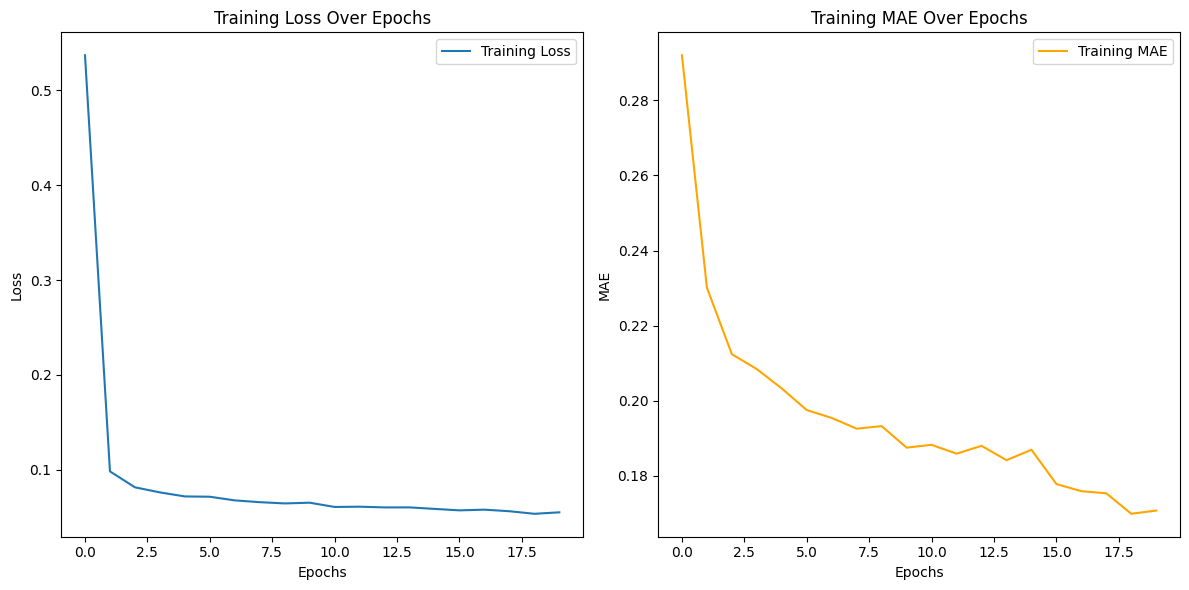

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading the datasets.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preprocessing the data
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

# Normalization of features using StandardScaler to ensure all features contribute equally.
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

# Sequence creation function to prepare data for LSTM input, ensuring time-series data is correctly structured.
def create_sequences(data, target_column, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length][target_column]
        sequences.append((sequence, label))
    return sequences

sequence_length = 5
train_sequences = create_sequences(train_scaled, 0, sequence_length)
test_sequences = create_sequences(test_scaled, 0, sequence_length)

# Conversion of sequences to tensors, the required format for training in PyTorch.
def create_tensors(sequences):
    X, y = [], []
    for sequence, label in sequences:
        X.append(sequence)
        y.append(label)
    return torch.Tensor(X), torch.Tensor(y)

X_train, y_train = create_tensors(train_sequences)
X_test, y_test = create_tensors(test_sequences)

# DataLoaders to handle batching and shuffling, crucial for effective and efficient training.
batch_size = 32
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Improved LSTM Model with additional layers and dropout for better learning and regularization.
# This modification aims to enhance the model's ability to capture complex patterns in the data while preventing overfitting.
class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, num_layers, dropout):
        super(ImprovedLSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

# Model initialization with refined hyperparameters to optimize performance.
input_size = train_scaled.shape[1]
hidden_layer_size = 50
output_size = 1
num_layers = 2
dropout = 0.2
model = ImprovedLSTMModel(input_size, hidden_layer_size, output_size, num_layers, dropout)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate Mean Absolute Error, an important metric for regression models.
def mean_absolute_error(predictions, actuals):
    return np.mean(np.abs(np.array(actuals) - np.array(predictions)))

# Enhanced training loop with loss and MAE recording for each epoch.
# This addition helps in monitoring the model's performance and understanding its learning trajectory.
epochs = 20
train_losses = []
train_mae = []
for epoch in range(epochs):
    epoch_losses = []
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = loss_function(y_pred.view(-1), labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    train_loss = np.mean(epoch_losses)
    train_losses.append(train_loss)
    train_predictions, train_actuals = evaluate_model(model, train_loader)
    epoch_mae = mean_absolute_error(train_predictions, train_actuals)
    train_mae.append(epoch_mae)
    print(f'Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f}, MAE: {epoch_mae:.4f}')

# Visualization of training loss and MAE for a clear understanding of the model's learning progress.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Training MAE', color='orange')
plt.title('Training MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


Before Optimizations Loss and MAE decreased steadily, which suggests that the initial model was learning effectively from the data. The final Mean Squared Error (MSE) was approximately 0.00497, indicating a relatively good fit.However after optimizations we experienced slightly higher initial loss and MAE. The reason behin might be that the model's architecture is more complex now and might interfere with its lerning capabilities.

#2d
Optimize hyperparameters. This might include dropout, regularization, etc

Epoch 1/50 - Train Loss: 0.9961, Val Loss: 0.9934
Epoch 2/50 - Train Loss: 0.9888, Val Loss: 0.9950
Epoch 3/50 - Train Loss: 1.0048, Val Loss: 0.9924
Epoch 4/50 - Train Loss: 0.9897, Val Loss: 0.9989
Epoch 5/50 - Train Loss: 0.9859, Val Loss: 0.9974
Epoch 6/50 - Train Loss: 0.9884, Val Loss: 1.0027
Epoch 7/50 - Train Loss: 0.9923, Val Loss: 1.0050
Epoch 8/50 - Train Loss: 0.9827, Val Loss: 1.0016
Early stopping!


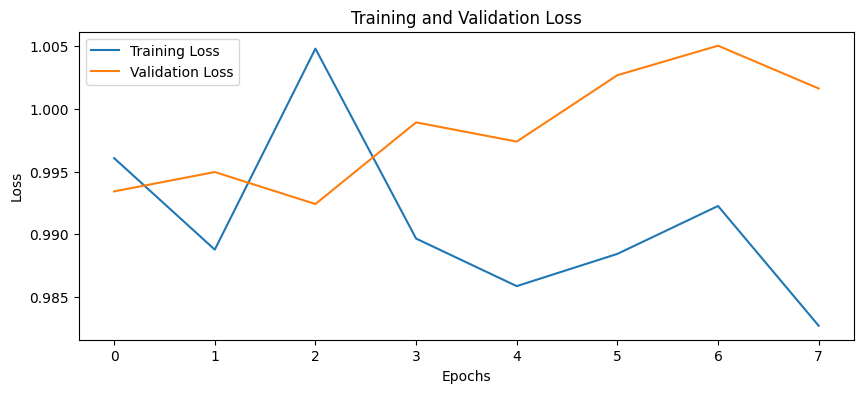

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data is loaded and proccessed
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

# Features are normalized using StandardScaler to scale them to a uniform range, enhancing model performance.
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

# The dataset is split into training and validation sets to enable model evaluation during training.
train_scaled, val_scaled = train_test_split(train_scaled, test_size=0.2, random_state=42)

# A function to create sequences from the dataset is defined, essential for feeding time-series data into LSTM.
def create_sequences(data, target_column, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length][target_column]
        sequences.append((sequence, label))
    return sequences
sequence_length = 5
train_sequences = create_sequences(train_scaled, 0, sequence_length)
val_sequences = create_sequences(val_scaled, 0, sequence_length)
test_sequences = create_sequences(test_scaled, 0, sequence_length)

# Sequences are converted to tensors, the required format for PyTorch models.
def create_tensors(sequences):
    X, y = [], []
    for sequence, label in sequences:
        X.append(sequence)
        y.append(label)
    return torch.Tensor(X), torch.Tensor(y)
X_train, y_train = create_tensors(train_sequences)
X_val, y_val = create_tensors(val_sequences)
X_test, y_test = create_tensors(test_sequences)

# DataLoaders are set up for training, validation, and testing, allowing for efficient data handling and batching.
batch_size = 32
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_data = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size)

# The LSTM model is defined with parameterized dropout to prevent overfitting
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, num_layers, dropout):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

# Hyperparameters are set for the model, tested a variety selection of learning rate and weight decay for optimization.
input_size = train_scaled.shape[1]
hidden_layer_size = 50
output_size = 1
num_layers = 2
dropout = 0.3
learning_rate = 0.001
weight_decay = 1e-4
model = LSTMModel(input_size, hidden_layer_size, output_size, num_layers, dropout)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Training includes early stopping to prevent overfitting and to halt training when validation loss ceases to decrease.
epochs = 50
patience = 5
best_val_loss = float('inf')
trigger_times = 0
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_losses = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = loss_function(y_pred.view(-1), labels)
        loss.backward()
        optimizer.step()
        epoch_train_losses.append(loss.item())
    train_loss = np.mean(epoch_train_losses)
    train_losses.append(train_loss)

    # Validation phase to monitor model performance on unseen data.
    model.eval()
    with torch.no_grad():
        epoch_val_losses = []
        for inputs, labels in val_loader:
            y_pred = model(inputs)
            val_loss = loss_function(y_pred.view(-1), labels)
            epoch_val_losses.append(val_loss.item())
    val_loss = np.mean(epoch_val_losses)
    val_losses.append(val_loss)
    print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping .
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

# The training and validation losses plots visualizing model's learning trends.
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
